In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
print(train_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [7]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [9]:
train_images[0].shape

(28, 28)

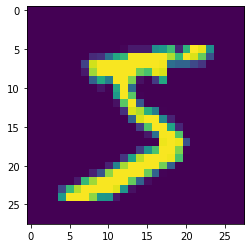

In [14]:
plt.imshow(train_images[0])

In [15]:
train_labels[0]

5

In [16]:
model = tf.keras.models.Sequential()

In [17]:
model.add(tf.keras.layers.Dense(512,activation="relu",input_shape=(28*28,)))

In [18]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="categorical_crossentropy", metrics = ["accuracy"])

In [22]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

In [24]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [25]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [26]:
train = model.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 8ms/step - loss: 0.2611 - accuracy: 0.9243
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1047 - accuracy: 0.9695
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0491 - accuracy: 0.9851
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0371 - accuracy: 0.9891
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0276 - accuracy: 0.9918
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0221 - accuracy: 0.9936
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.0167 - accuracy: 0.9952
Epoch 9/25
469/469 [==============================] - 4s 7ms/step - loss: 0.0124 - accuracy: 0.9964
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0100 - accuracy: 0.9970

In [27]:
train.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 0, 'Epoch')

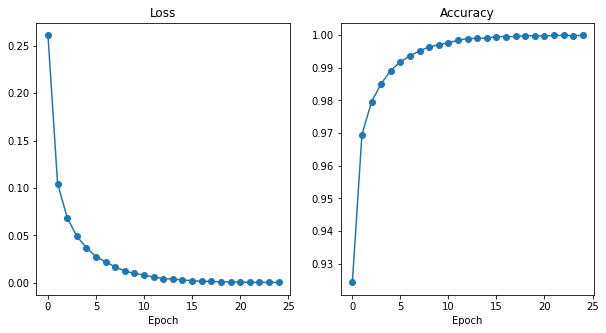

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax1.plot(np.arange(25),train.history['loss'],"o-")
ax1.set_title("Loss")
ax1.set_xlabel("Epoch")
ax2.plot(np.arange(25),train.history['accuracy'],"o-")
ax2.set_title("Accuracy")
ax2.set_xlabel("Epoch")


In [41]:
test = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9812


In [43]:
test

[0.11382097005844116, 0.9811999797821045]

In [44]:
import imageio

In [46]:
my_handwriting = plt.imread("my_handwriting.png")

In [52]:
my_handwriting.shape

(28, 28, 4)

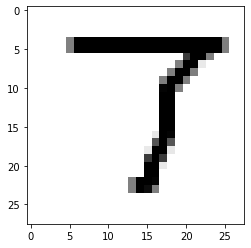

In [81]:
plt.imshow(my_handwriting)

In [84]:
my_image = my_handwriting[:,:,0].astype("float32") / 255

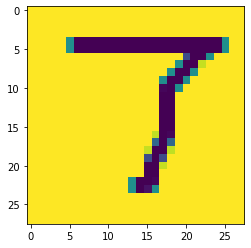

In [85]:
plt.imshow(my_image)

In [90]:
my_pred = model.predict(my_image.reshape(1,28*28))

In [92]:
np.argmax(my_pred)

2

In [96]:
my_image_v2 = np.where(my_image > 0.5, 1, 0)

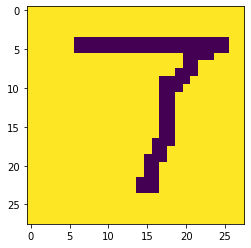

In [97]:
plt.imshow(my_image_v2)

In [99]:
my_pred_2 = model.predict(my_image_v2.reshape(1,28*28))

In [102]:
np.argmax(my_pred_2)

2

In [106]:
test_images[0].shape

(784,)

In [110]:
np.argmax(model.predict(test_images[0].reshape(1,-1)))

7

In [112]:
np.argmax(test_labels[0])

7

In [113]:
model.predict(test_images)

array([[4.6549460e-21, 3.0564944e-28, 1.3205955e-17, ..., 1.0000000e+00,
        3.8054622e-22, 3.0489101e-15],
       [1.0425843e-22, 1.8605416e-17, 1.0000000e+00, ..., 0.0000000e+00,
        2.2525127e-22, 3.9152674e-37],
       [1.7921745e-18, 1.0000000e+00, 1.6231280e-09, ..., 3.6315936e-10,
        4.9153672e-09, 5.9772634e-17],
       ...,
       [1.2520317e-34, 7.8501680e-31, 3.5543383e-31, ..., 1.3422941e-15,
        1.2478988e-17, 1.6006441e-14],
       [2.2865750e-26, 6.1541301e-30, 1.4002952e-34, ..., 1.6311106e-31,
        1.0652586e-14, 7.7904182e-30],
       [4.8328328e-28, 0.0000000e+00, 2.0573239e-28, ..., 0.0000000e+00,
        8.6675893e-32, 2.0509168e-33]], dtype=float32)